In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [57]:
df = pd.read_csv("final.csv", parse_dates=['date'])

In [58]:
df["mmndvi"] = (df.max_ndvi + 2000) / 12000

### ANWR region

In [59]:
df_anwr = df[df.region == "anwr"]

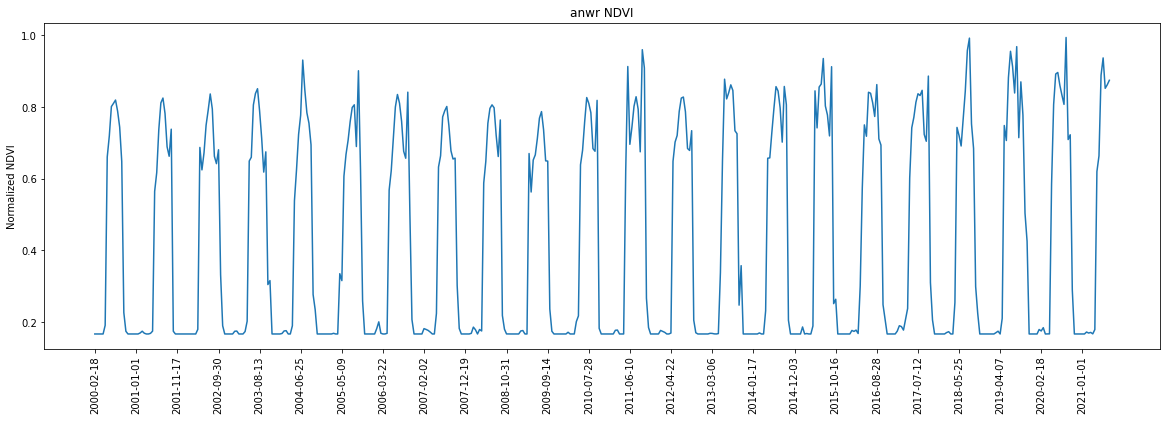

In [60]:
_df = df_anwr.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("anwr NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.62111, p=0.00204, std_err=0.00173
Slope: 0.00615
Average max NDVI: 0.87860


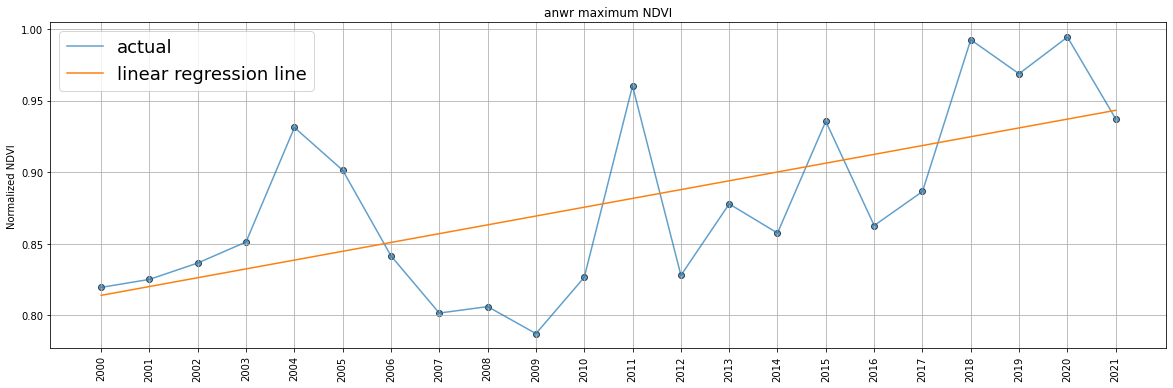

In [61]:
_df = df_anwr.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("anwr maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

Linear regression: r=-0.06714, p=0.76655, std_err=0.00125
Slope: -0.00038
Average max NDVI: 0.87860


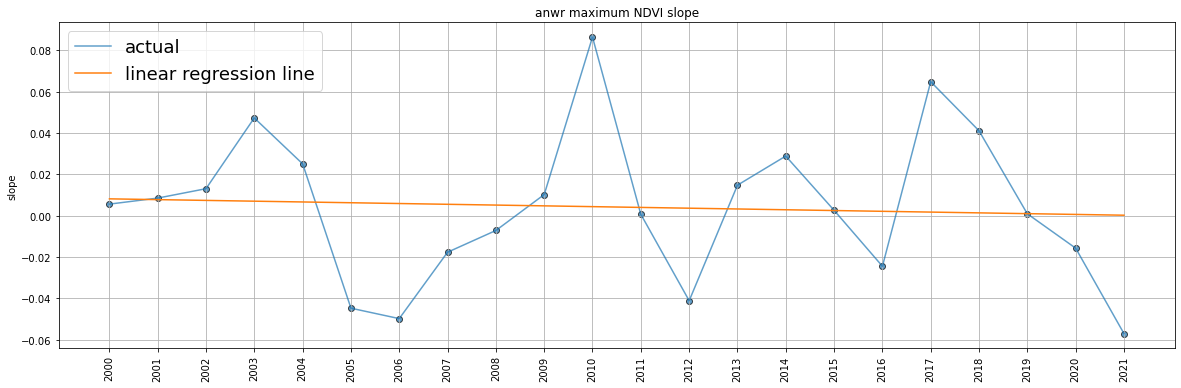

In [62]:
_df["slope"] = np.gradient(_df.mmndvi, 1)
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.slope)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("anwr maximum NDVI slope")
plt.ylabel("slope")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.slope, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.slope, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

Linear regression: r=-0.03783, p=0.86725, std_err=0.12676
Slope: -0.02146
Average max NDVI: 0.87860


,region,max_ndvi,mmndvi,date,slope
date,,,,,
2009-12-31,anwr,7448,0.787333,2009-12-31,0.010208
2007-12-31,anwr,7620,0.801667,2007-12-31,-0.017708
2008-12-31,anwr,7674,0.806167,2008-12-31,-0.007167
2000-12-31,anwr,7835,0.819583,2000-12-31,0.005583
2001-12-31,anwr,7902,0.825167,2001-12-31,0.008500
2010-12-31,anwr,7919,0.826583,2010-12-31,0.086417
2012-12-31,anwr,7936,0.828000,2012-12-31,-0.041167
2002-12-31,anwr,8039,0.836583,2002-12-31,0.013042
2006-12-31,anwr,8099,0.841583,2006-12-31,-0.049833


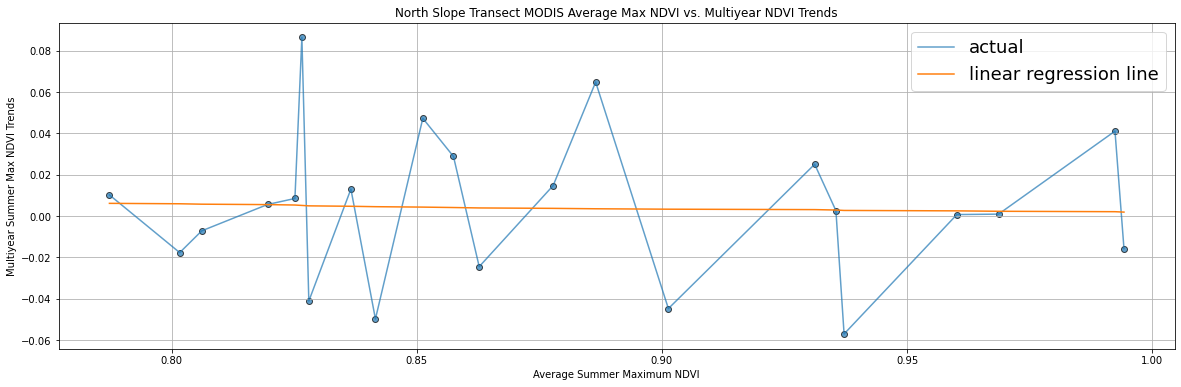

In [63]:
_df = _df.sort_values("mmndvi")
m, c, r_value, p_value, std_err = linregress(_df.mmndvi, _df.slope)
_y = np.arange(np.min(_df.mmndvi), np.max(_df.mmndvi), (np.max(_df.mmndvi) - np.min(_df.mmndvi))/len(_df.mmndvi))
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("North Slope Transect MODIS Average Max NDVI vs. Multiyear NDVI Trends")
plt.ylabel("Multiyear Summer Max NDVI Trends")
plt.xlabel("Average Summer Maximum NDVI")
#plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.mmndvi, _df.slope, alpha=0.7, edgecolors="k")
plt.plot(_df.mmndvi, _df.slope, alpha=0.7, label="actual")
plt.plot(_df.mmndvi, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")
_df

### Ivotuk region

In [7]:
df_ivotuk = df[df.region == "ivotuk"]

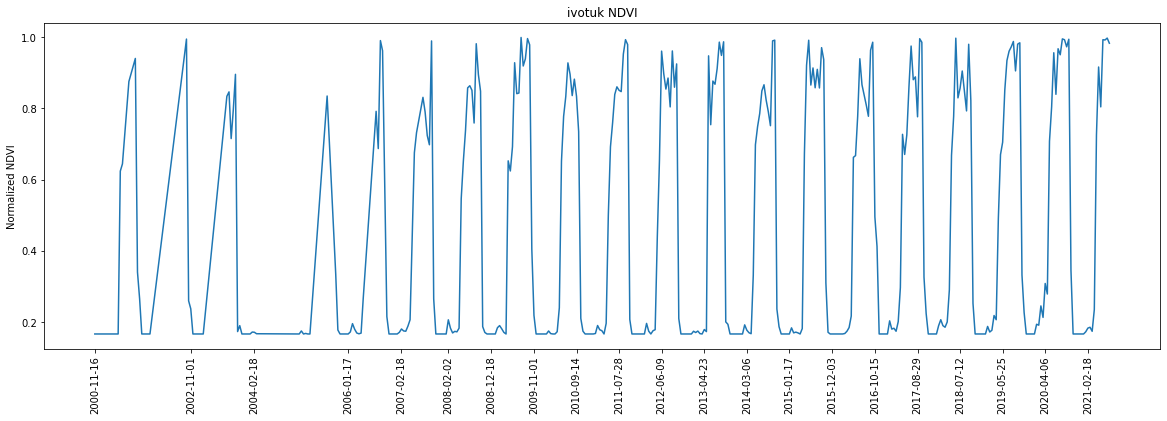

In [8]:
_df = df_ivotuk.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("ivotuk NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.49396, p=0.01946, std_err=0.00717
Slope: 0.01822
Average max NDVI: 0.89877


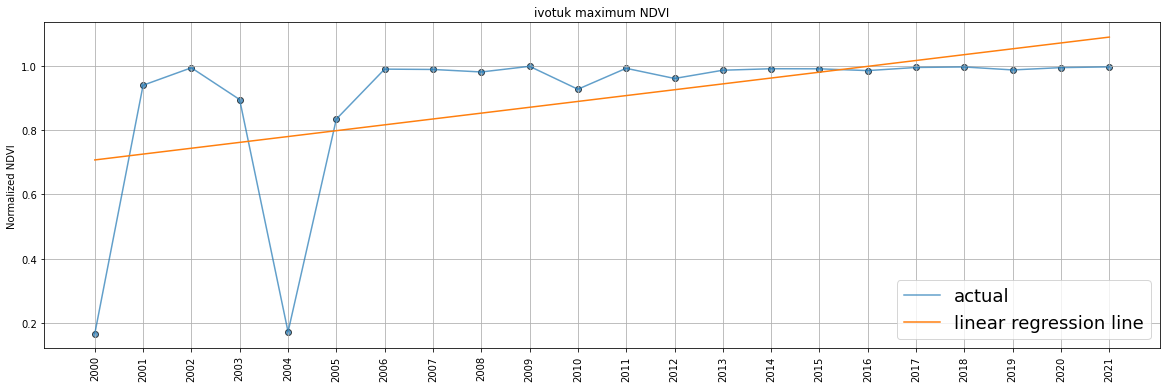

In [9]:
_df = df_ivotuk.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("ivotuk maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

Linear regression: r=0.55262, p=0.00765, std_err=0.00134
Slope: 0.00396
Average max NDVI: 0.96542


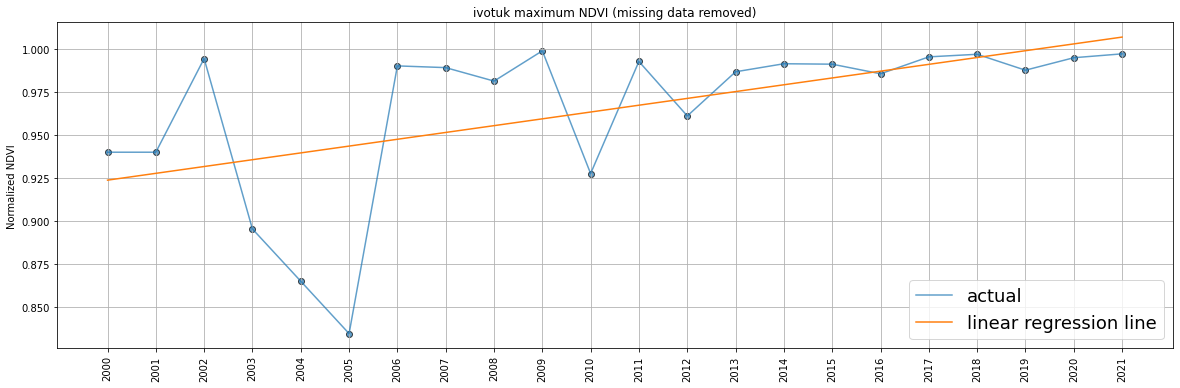

In [10]:
_df.iloc[4,2] = (_df.iloc[3,2] + _df.iloc[5,2]) / 2
_df.iloc[0,2] = _df.iloc[1,2]
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("ivotuk maximum NDVI (missing data removed)")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")

### prudhoebay region

In [11]:
df_prudhoebay = df[df.region == "prudhoebay"]

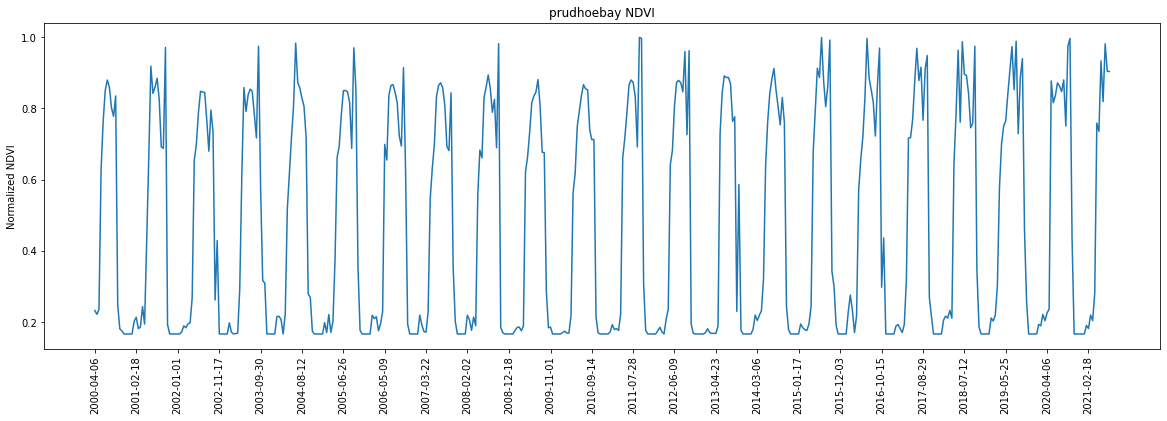

In [12]:
_df = df_prudhoebay.copy()
_df['date'] = pd.to_datetime(_df['date']).dt.date
plt.figure(figsize=(20,6))
plt.title("prudhoebay NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date[::20], _df.date[::20], rotation='vertical')
plt.plot(_df.date, _df.mmndvi)

Linear regression: r=0.44433, p=0.03829, std_err=0.00159
Slope: 0.00354
Average max NDVI: 0.94640


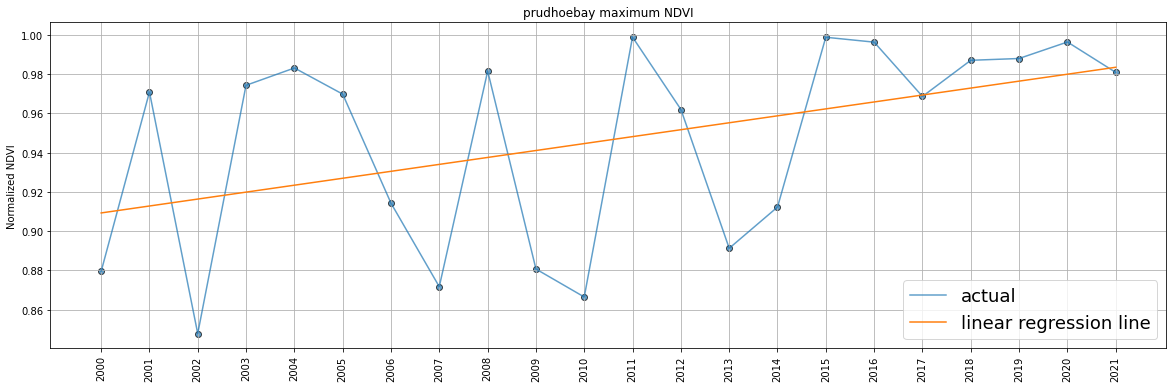

In [13]:
_df = df_prudhoebay.copy()
_df = _df.groupby(by=pd.Grouper(key='date', freq='Y')).max()
_df["date"] = _df.index
_df['date'] = pd.to_datetime(_df['date']).dt.date
m, c, r_value, p_value, std_err = linregress(np.arange(1, len(_df.date)+1), _df.mmndvi)
_y = np.arange(1, len(_df)+1)
_y = m*_y + c
plt.figure(figsize=(20,6))
plt.title("prudhoebay maximum NDVI")
plt.ylabel("Normalized NDVI")
plt.xticks(_df.date, [str(x).split("-")[0] for x in _df.date], rotation='vertical')
plt.scatter(_df.date, _df.mmndvi, alpha=0.7, edgecolors="k")
plt.plot(_df.date, _df.mmndvi, alpha=0.7, label="actual")
plt.plot(_df.date, _y, label="linear regression line")
plt.legend(fontsize=18)
plt.grid()
print(f"Linear regression: r={r_value:0.5f}, p={p_value:0.5f}, std_err={std_err:0.5f}")
print(f"Slope: {m:0.5f}")
print(f"Average max NDVI: {np.mean(_df.mmndvi):0.5f}")